In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Initialize the graph
G = nx.Graph()

# Example data
employees = [
    {"name": "Alice Johnson", "department": "IT", "experience": 8, "ds_experience": 5, "skills": ["Python", "SQL", "Machine Learning", "R"]},
    {"name": "Bob Smith", "department": "Finance", "experience": 10, "ds_experience": 3, "skills": ["SQL", "Tableau", "Data Analysis", "Excel"]},
    {"name": "Carol White", "department": "Marketing", "experience": 6, "ds_experience": 2, "skills": ["Python", "SEO", "R", "Data Visualization"]},
    {"name": "David Lee", "department": "Data Science", "experience": 12, "ds_experience": 7, "skills": ["Python", "Deep Learning", "SQL", "TensorFlow"]},
    {"name": "Eva Green", "department": "HR", "experience": 5, "ds_experience": 1, "skills": ["Python", "HR Analytics", "SQL"]}
]

departments = ["IT", "Finance", "Marketing", "Data Science", "HR"]

skills = ["Python", "SQL", "Machine Learning", "R", "Tableau", "Data Analysis", "Excel", "SEO", "Data Visualization", "Deep Learning", "TensorFlow", "HR Analytics"]

# Add Department nodes
for department in departments:
    G.add_node(department, type='Department')

# Add Skill nodes
for skill in skills:
    G.add_node(skill, type='Skill')

# Add Employee nodes and relationships
for employee in employees:
    G.add_node(employee["name"], type='Employee', experience=employee["experience"], ds_experience=employee["ds_experience"])
    G.add_edge(employee["name"], employee["department"], relationship='WORKS_IN')

    for skill in employee["skills"]:
        G.add_edge(employee["name"], skill, relationship='HAS_SKILL')

# Add relationships between Data Science department and required skills
ds_skills = ["Python", "SQL", "Machine Learning", "R", "Data Analysis", "Deep Learning", "TensorFlow"]
for skill in ds_skills:
    G.add_edge("Data Science", skill, relationship='NEEDS_SKILL')


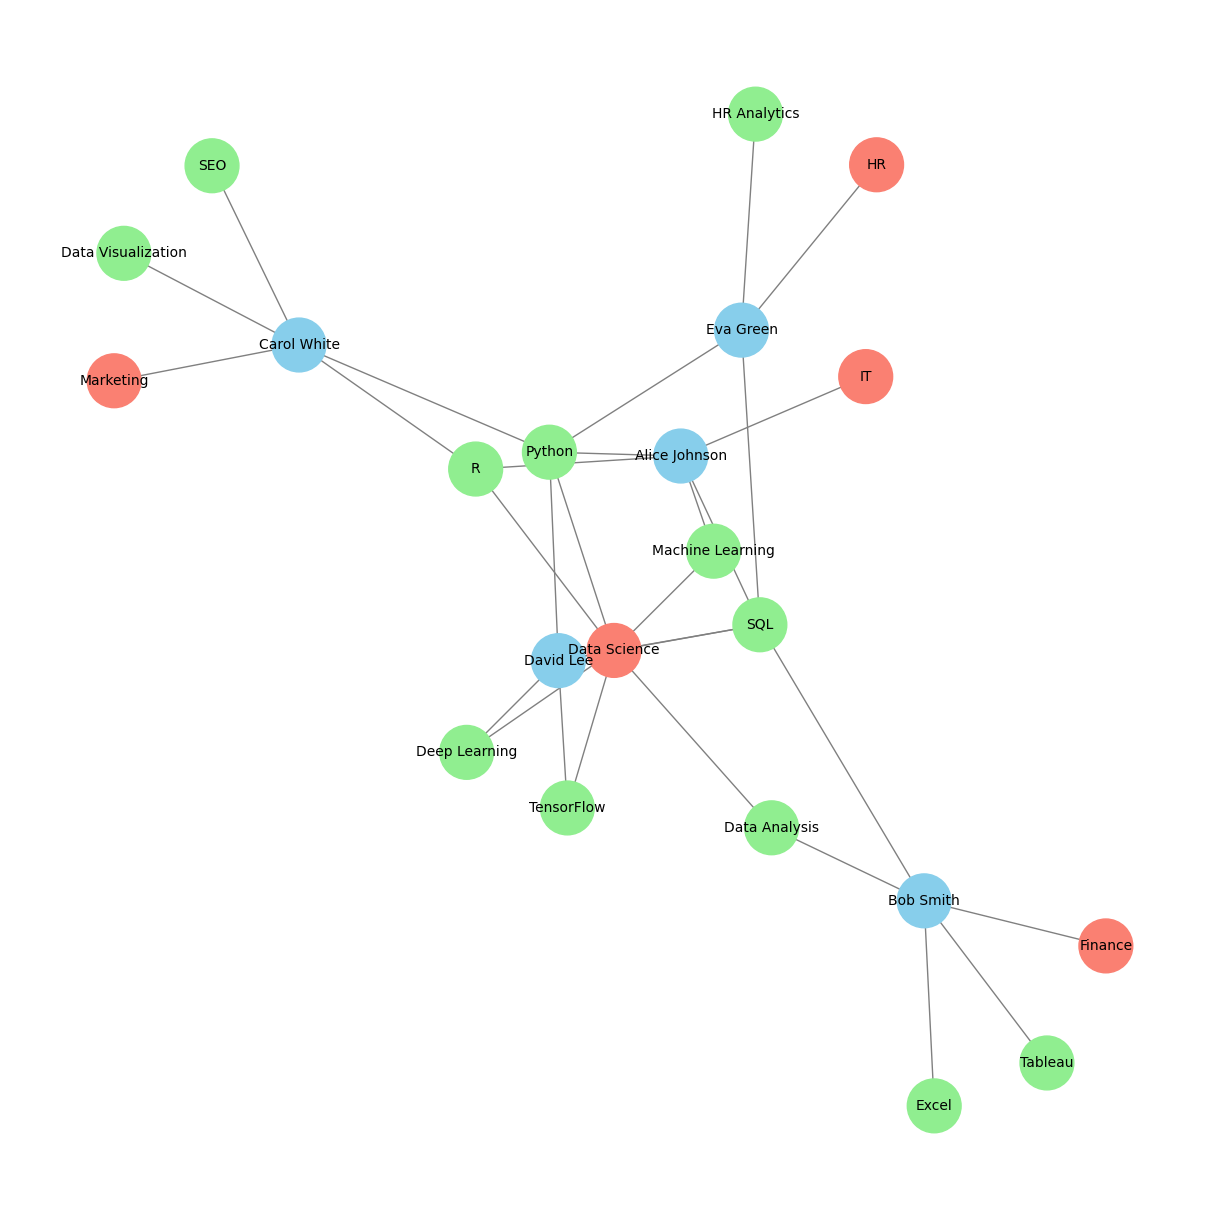

In [ ]:
# Draw the graph
plt.figure(figsize=(12, 12))

# Define positions
pos = nx.spring_layout(G, seed=42)

# Draw nodes with different colors based on their type
node_color = [G.nodes[n]['type'] for n in G.nodes()]
color_map = {'Employee': 'skyblue', 'Department': 'salmon', 'Skill': 'lightgreen'}

nx.draw(G, pos, with_labels=True, node_color=[color_map[node] for node in node_color], node_size=1500, font_size=10, font_color='black', edge_color='gray')

plt.show()


In [ ]:
# Function to find missing skills for an employee to fit into Data Science
def find_missing_skills(G, employee_name):
    # Get the skills of the employee
    employee_skills = {neighbor for neighbor in G.neighbors(employee_name) if G.nodes[neighbor]['type'] == 'Skill'}

    # Get the skills required for the Data Science department
    ds_skills = {neighbor for neighbor in G.neighbors('Data Science') if G.nodes[neighbor]['type'] == 'Skill'}

    # Determine the missing skills
    missing_skills = ds_skills - employee_skills

    return missing_skills

# Query for Bob Smith
missing_skills_bob = find_missing_skills(G, "Bob Smith")
print(f"Skills Bob Smith needs to acquire for Data Science: {missing_skills_bob}")


Skills Bob Smith needs to acquire for Data Science: {'Python', 'Deep Learning', 'Machine Learning', 'R', 'TensorFlow'}


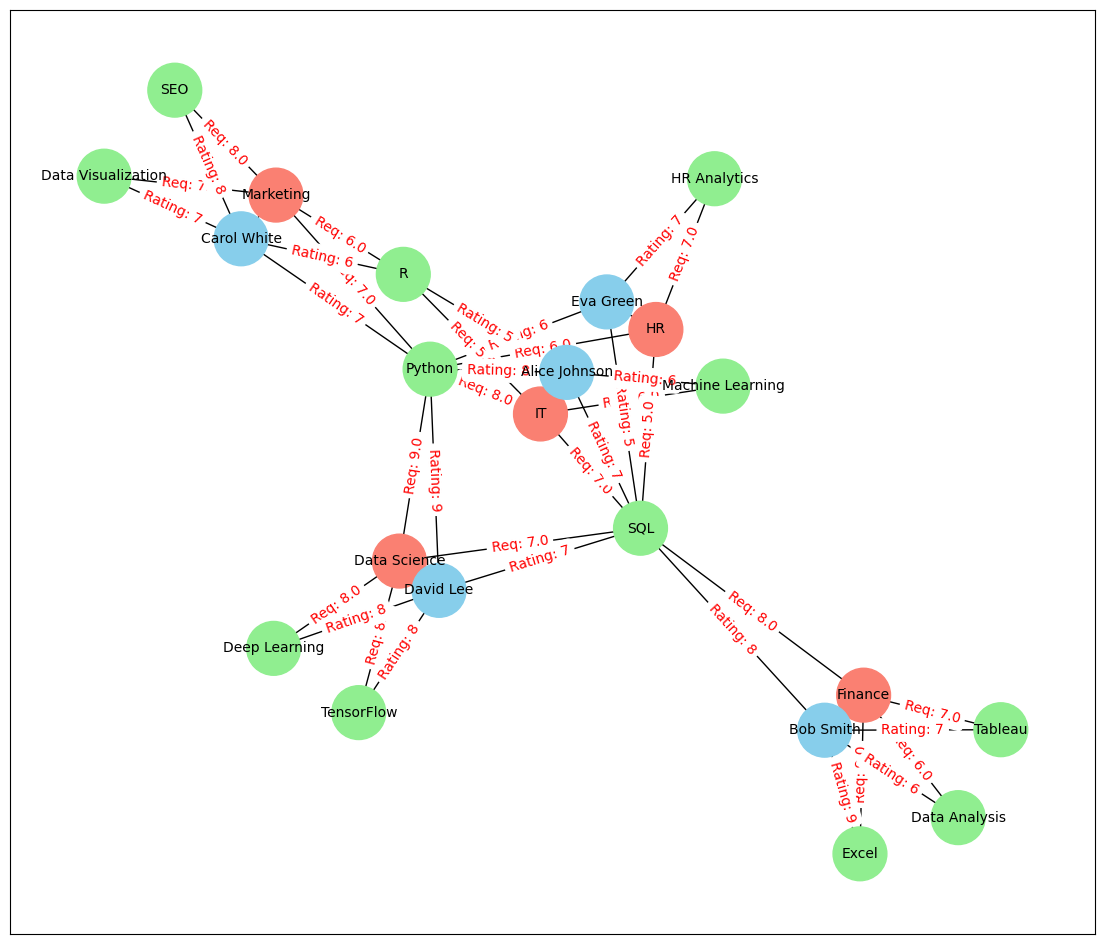


Department: IT
Matching skills: {}
Missing skills: {'Machine Learning': 6.0, 'R': 5.0}
Skills to improve: {'Python': 'Current: 6, Required: 8.0', 'SQL': 'Current: 5, Required: 7.0'}

Department: Finance
Matching skills: {'Data Analysis': 7}
Missing skills: {'Tableau': 7.0, 'Excel': 9.0}
Skills to improve: {'SQL': 'Current: 5, Required: 8.0'}

Department: Marketing
Matching skills: {}
Missing skills: {'R': 6.0, 'Data Visualization': 7.0, 'SEO': 8.0}
Skills to improve: {'Python': 'Current: 6, Required: 7.0'}

Department: Data Science
Matching skills: {}
Missing skills: {'TensorFlow': 8.0, 'Deep Learning': 8.0}
Skills to improve: {'Python': 'Current: 6, Required: 9.0', 'SQL': 'Current: 5, Required: 7.0'}

Department: HR
Matching skills: {'Python': 6, 'SQL': 5}
Missing skills: {'HR Analytics': 7.0}
Skills to improve: {}

Best fit department for the candidate: HR
Details:
Matching skills: {'Python': 6, 'SQL': 5}
Missing skills: {'HR Analytics': 7.0}
Skills to improve: {}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Example extended data with skill ratings
employees_with_ratings = [
    {
        "name": "Alice Johnson", "department": "IT", "experience": 8, "ds_experience": 5,
        "skills": {"Python": 8, "SQL": 7, "Machine Learning": 6, "R": 5}
    },
    {
        "name": "Bob Smith", "department": "Finance", "experience": 10, "ds_experience": 3,
        "skills": {"SQL": 8, "Tableau": 7, "Data Analysis": 6, "Excel": 9}
    },
    {
        "name": "Carol White", "department": "Marketing", "experience": 6, "ds_experience": 2,
        "skills": {"Python": 7, "SEO": 8, "R": 6, "Data Visualization": 7}
    },
    {
        "name": "David Lee", "department": "Data Science", "experience": 12, "ds_experience": 7,
        "skills": {"Python": 9, "Deep Learning": 8, "SQL": 7, "TensorFlow": 8}
    },
    {
        "name": "Eva Green", "department": "HR", "experience": 5, "ds_experience": 1,
        "skills": {"Python": 6, "HR Analytics": 7, "SQL": 5}
    }
]

departments = ["IT", "Finance", "Marketing", "Data Science", "HR"]

skills = ["Python", "SQL", "Machine Learning", "R", "Tableau", "Data Analysis", "Excel", "SEO", "Data Visualization", "Deep Learning", "TensorFlow", "HR Analytics"]

# Step 1: Aggregate Skill Ratings by Department

# Initialize dictionaries to store the sum and count of skill ratings per department
skill_sum = defaultdict(lambda: defaultdict(int))
skill_count = defaultdict(lambda: defaultdict(int))

# Aggregate the skill ratings for each department
for employee in employees_with_ratings:
    department = employee["department"]
    for skill, rating in employee["skills"].items():
        skill_sum[department][skill] += rating
        skill_count[department][skill] += 1

# Calculate the average skill rating for each skill in each department
average_skill_ratings = defaultdict(dict)
for department in skill_sum:
    for skill in skill_sum[department]:
        average_skill_ratings[department][skill] = skill_sum[department][skill] / skill_count[department][skill]

# Step 2: Build the Knowledge Graph with `networkx`

# Initialize the graph
G = nx.Graph()

# Add Department nodes
for department in departments:
    G.add_node(department, type='Department')

# Add Skill nodes
for skill in skills:
    G.add_node(skill, type='Skill')

# Add Employee nodes and relationships with skill ratings
for employee in employees_with_ratings:
    G.add_node(employee["name"], type='Employee', experience=employee["experience"], ds_experience=employee["ds_experience"])
    G.add_edge(employee["name"], employee["department"], relationship='WORKS_IN')

    for skill, rating in employee["skills"].items():
        G.add_edge(employee["name"], skill, relationship='HAS_SKILL', rating=rating)

# Add relationships between each department and required skills with dynamic thresholds
for department, skill_ratings in average_skill_ratings.items():
    for skill, threshold in skill_ratings.items():
        G.add_edge(department, skill, relationship='NEEDS_SKILL', required_rating=threshold)

# Step 3: Visualize the Knowledge Graph

# Draw the graph
plt.figure(figsize=(14, 12))

# Define positions
pos = nx.spring_layout(G, seed=42)

# Draw nodes with different colors based on their type
# Ensure to handle cases where 'type' might not be set by adding a default color
color_map = {'Employee': 'skyblue', 'Department': 'salmon', 'Skill': 'lightgreen'}
node_colors = [color_map.get(G.nodes[n].get('type', 'Unknown'), 'gray') for n in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels for skill ratings and required ratings
edge_labels = {}
for u, v, d in G.edges(data=True):
    if 'rating' in d:
        edge_labels[(u, v)] = f"Rating: {d['rating']}"
    elif 'required_rating' in d:
        edge_labels[(u, v)] = f"Req: {d['required_rating']}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()

# Step 4: Evaluate Candidate Fit and Identify Gaps

def check_fit_and_gaps_dynamic(G, candidate_skills, department_name):
    # Get the department's required skills and ratings (dynamic thresholds)
    department_requirements = {
        neighbor: G.edges[department_name, neighbor]['required_rating']
        for neighbor in G.neighbors(department_name) if G.nodes[neighbor].get('type') == 'Skill'
    }

    # Get all skills required by the department
    all_department_skills = set(department_requirements.keys())

    # Determine the skills the candidate has that meet the department's requirements
    matching_skills = {
        skill: rating for skill, rating in candidate_skills.items()
        if skill in department_requirements and rating >= department_requirements[skill]
    }

    # Determine the missing skills as per department requirements
    missing_skills = {
        skill: department_requirements[skill] for skill in all_department_skills
        if skill not in candidate_skills
    }

    # Determine the skills the candidate needs to improve to meet the requirements
    skills_to_improve = {
        skill: (candidate_skills.get(skill, 0), department_requirements[skill]) for skill in department_requirements
        if skill in candidate_skills and candidate_skills[skill] < department_requirements[skill]
    }

    return matching_skills, missing_skills, skills_to_improve

# Example candidate skills
candidate_skills_example = {"Python": 6, "SQL": 5, "Data Analysis": 7}

# Check fit and gaps for each department dynamically and determine the best fit
best_department = None
best_match_score = -1
best_fit_details = {}

for department in departments:
    matching_skills, missing_skills, skills_to_improve = check_fit_and_gaps_dynamic(G, candidate_skills_example, department)

    # Calculate a simple match score based on number of matching skills and total number of required skills
    match_score = len(matching_skills) - (len(missing_skills) + len(skills_to_improve))

    if match_score > best_match_score:
        best_match_score = match_score
        best_department = department
        best_fit_details = {
            "matching_skills": matching_skills,
            "missing_skills": missing_skills,
                        "skills_to_improve": skills_to_improve
        }

    print(f"\nDepartment: {department}")
    print("Matching skills:", matching_skills)
    print("Missing skills:", missing_skills)
    print("Skills to improve:", {skill: f"Current: {current}, Required: {required}" for skill, (current, required) in skills_to_improve.items()})

# Output the best fit department
print(f"\nBest fit department for the candidate: {best_department}")
print("Details:")
print("Matching skills:", best_fit_details["matching_skills"])
print("Missing skills:", best_fit_details["missing_skills"])
print("Skills to improve:", {skill: f"Current: {current}, Required: {required}" for skill, (current, required) in best_fit_details["skills_to_improve"].items()})



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


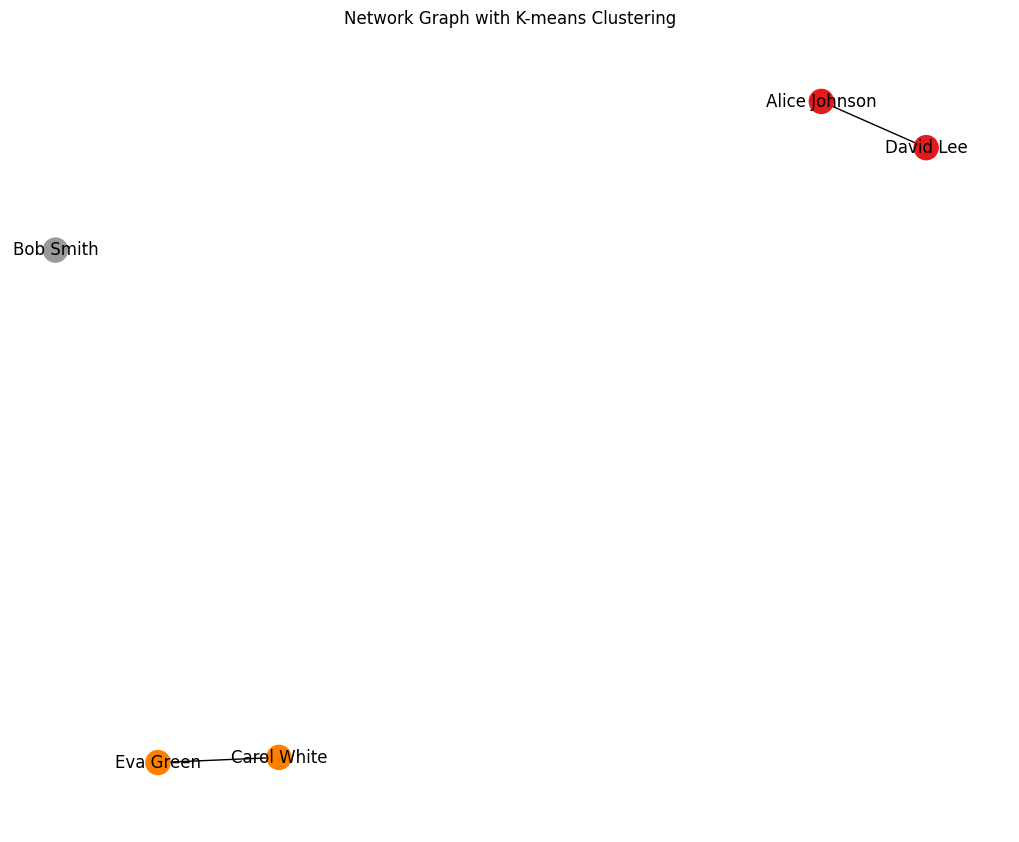

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Example data
employees_with_ratings = [
    {"name": "Alice Johnson", "department": "IT", "experience": 8, "ds_experience": 5,
     "skills": {"Python": 8, "SQL": 7, "Machine Learning": 6, "R": 5}},
    {"name": "Bob Smith", "department": "Finance", "experience": 10, "ds_experience": 3,
     "skills": {"SQL": 8, "Tableau": 7, "Data Analysis": 6, "Excel": 9}},
    {"name": "Carol White", "department": "Marketing", "experience": 6, "ds_experience": 2,
     "skills": {"Python": 7, "SEO": 8, "R": 6, "Data Visualization": 7}},
    {"name": "David Lee", "department": "Data Science", "experience": 12, "ds_experience": 7,
     "skills": {"Python": 9, "Deep Learning": 8, "SQL": 7, "TensorFlow": 8}},
    {"name": "Eva Green", "department": "HR", "experience": 5, "ds_experience": 1,
     "skills": {"Python": 6, "HR Analytics": 7, "SQL": 5}}
]

# Extract features
features = []
for employee in employees_with_ratings:
    feature_vector = [employee["experience"], employee["ds_experience"]]
    skill_ratings = [employee["skills"].get(skill, 0) for skill in ["Python", "SQL", "Machine Learning", "R"]]
    feature_vector.extend(skill_ratings)
    features.append(feature_vector)

# Convert to numpy array
X = np.array(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Create a graph
G = nx.Graph()

# Add nodes with cluster labels as attributes
for i, employee in enumerate(employees_with_ratings):
    G.add_node(employee["name"], department=employee["department"], cluster=cluster_labels[i])

# Add edges between nodes in the same cluster
for i, j in np.argwhere(cluster_labels[:, None] == cluster_labels):
    if i != j:
        G.add_edge(employees_with_ratings[i]["name"], employees_with_ratings[j]["name"])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
node_colors = [cluster_labels[i] for i in range(len(employees_with_ratings))]
nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.Set1)
plt.title("Network Graph with K-means Clustering")
plt.show()


The best-suited department for the candidate is: IT


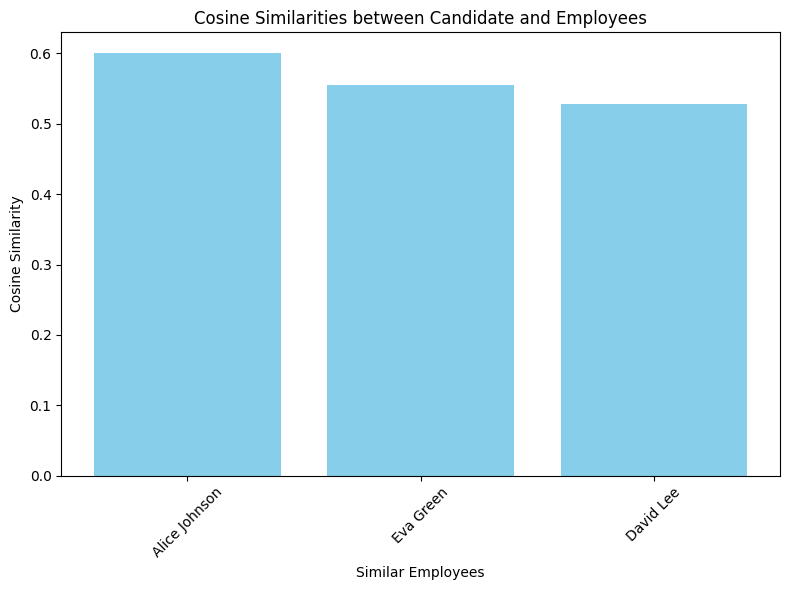


Department: IT
Matching skills: {}
Missing skills: {'Machine Learning': 6, 'R': 5}
Skills to improve: {'Python': 'Current: 6, Required: 8', 'SQL': 'Current: 5, Required: 7'}

Department: Data Science
Matching skills: {}
Missing skills: {'Deep Learning': 8, 'TensorFlow': 8}
Skills to improve: {'Python': 'Current: 6, Required: 9', 'SQL': 'Current: 5, Required: 7'}

Department: Finance
Matching skills: {'Data Analysis': 6}
Missing skills: {'Tableau': 7, 'Excel': 9}
Skills to improve: {'SQL': 'Current: 5, Required: 8'}

Department: Marketing
Matching skills: {}
Missing skills: {'SEO': 8, 'R': 6, 'Data Visualization': 7}
Skills to improve: {'Python': 'Current: 6, Required: 7'}

Department: HR
Matching skills: {'Python': 6, 'SQL': 5}
Missing skills: {'HR Analytics': 7}
Skills to improve: {}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
employees_with_ratings = [
    {"name": "Alice Johnson", "department": "IT", "skills": {"Python": 8, "SQL": 7, "Machine Learning": 6, "R": 5}},
    {"name": "Bob Smith", "department": "Finance", "skills": {"SQL": 8, "Tableau": 7, "Data Analysis": 6, "Excel": 9}},
    {"name": "Carol White", "department": "Marketing", "skills": {"Python": 7, "SEO": 8, "R": 6, "Data Visualization": 7}},
    {"name": "David Lee", "department": "Data Science", "skills": {"Python": 9, "Deep Learning": 8, "SQL": 7, "TensorFlow": 8}},
    {"name": "Eva Green", "department": "HR", "skills": {"Python": 6, "HR Analytics": 7, "SQL": 5}}
]

# Candidate's skills
candidate_skills = {"Python": 6, "SQL": 5, "Data Analysis": 7}  # Example candidate skills

# Step 1: Construct the User-Item Matrix
skills = set().union(*(employee["skills"].keys() for employee in employees_with_ratings))
employee_skills_matrix = np.zeros((len(employees_with_ratings), len(skills)))

for i, employee in enumerate(employees_with_ratings):
    for j, skill in enumerate(skills):
        if skill in employee["skills"]:
            employee_skills_matrix[i, j] = employee["skills"][skill]

# Step 2: Calculate Similarity Scores
def cosine_similarity(a, b):
    dot_product = sum(a[k] * b.get(k, 0) for k in a)
    norm_a = np.linalg.norm(list(a.values()))
    norm_b = np.linalg.norm(list(b.values()))
    return dot_product / (norm_a * norm_b) if (norm_a * norm_b) != 0 else 0

similarity_scores = [cosine_similarity(candidate_skills, dict(zip(skills, employee_skills)))
                     for employee_skills in employee_skills_matrix]

# Step 3: Select Top-N Similar Employees
top_n = min(3, len(employees_with_ratings))  # Example, choose top 3 similar employees or less if there are fewer employees
top_n_indices = np.argsort(similarity_scores)[-top_n:][::-1]
top_n_employees = [employees_with_ratings[i] for i in top_n_indices]
similarity_scores = [similarity_scores[i] for i in top_n_indices]


# Step 4: Determine Department Assignment
department_counts = {}
for employee in top_n_employees:
    department = employee["department"]
    department_counts[department] = department_counts.get(department, 0) + 1

best_department = max(department_counts, key=department_counts.get)

print(f"The best-suited department for the candidate is: {best_department}")

# Visualize Cosine Similarities
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_n_employees)), similarity_scores, color='skyblue')
plt.xlabel('Similar Employees')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarities between Candidate and Employees')
plt.xticks(range(len(top_n_employees)), [employee["name"] for employee in top_n_employees], rotation=45)
plt.tight_layout()
plt.show()

# Calculate missing skills, matching skills, and skills needing improvement for each department
def check_skills(candidate_skills, employee_skills):
    matching_skills = {}
    missing_skills = {}
    skills_to_improve = {}

    for skill, rating in employee_skills.items():
        if skill in candidate_skills:
            if candidate_skills[skill] >= rating:
                matching_skills[skill] = rating
            else:
                skills_to_improve[skill] = (candidate_skills[skill], rating)
        else:
            missing_skills[skill] = rating

    return matching_skills, missing_skills, skills_to_improve

department_skills_info = {}
for department in set([employee["department"] for employee in employees_with_ratings]):
    department_employees = [employee for employee in employees_with_ratings if employee["department"] == department]
    department_skills = set().union(*(employee["skills"].keys() for employee in department_employees))
    department_candidate_skills = {skill: rating for skill, rating in candidate_skills.items() if skill in department_skills}

    department_info = {
        "matching_skills": {},
        "missing_skills": {},
        "skills_to_improve": {}
    }

    for employee in department_employees:
        matching_skills, missing_skills, skills_to_improve = check_skills(department_candidate_skills, employee["skills"])
        department_info["matching_skills"].update(matching_skills)
        department_info["missing_skills"].update(missing_skills)
        department_info["skills_to_improve"].update(skills_to_improve)

    department_skills_info[department] = department_info

# Output department-wise skills information
for department, info in department_skills_info.items():
    print(f"\nDepartment: {department}")
    print("Matching skills:", info["matching_skills"])
    print("Missing skills:", info["missing_skills"])
    print("Skills to improve:", {skill: f"Current: {current}, Required: {required}" for skill, (current, required) in info["skills_to_improve"].items()})
